In [19]:
# 將心臟血管使用 roboflow 標註的檔案，重新命名

def rename_txt_files_in_folder(folder_path):
    # 取得資料夾中的所有檔案
    for filename in os.listdir(folder_path):
        # 檢查是否為 .txt 檔案
        if filename.endswith(".txt"):
            # 使用分割和連接的方式來處理檔名
            parts = filename.split('-')
            new_parts = []
            for i, part in enumerate(parts):
                if i < len(parts) - 1:
                    if parts[i+1].startswith("NT"):
                        new_parts.append(part + '@')
                    if parts[i+1].startswith("nt"):
                        new_parts.append(part + '@')
                    else:
                        new_parts.append(part + '+')
                else:
                    new_parts.append(part)
            
            new_filename = ''.join(new_parts)
            png_index = filename.find('_png')
            if png_index != -1:
                # 如果找到了 .png，將其後的資訊移除
                new_filename = new_filename[:png_index] + "_vessel.txt"
            
            # 重新命名檔案
            os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
            print(f"已重命名: {filename} -> {new_filename}")

# 指定資料夾路徑
folder_path = "D:\Paper\RGB_SFM\labels"
rename_txt_files_in_folder(folder_path)

已重命名: CV00001_1275_LAD_8_png.rf.7e943d002fcac9e101ef956d1e4172cc.txt -> CV00001_1275_LAD_8_vessel.txt
已重命名: CV00004_1350_LAD_8_png.rf.6c4440f178d321d2b1c4ce701765b936.txt -> CV00004_1350_LAD_8_vessel.txt
已重命名: CV00004_1352_LAD_8_png.rf.b492178b590ffa28e5cf4c6bed6eca56.txt -> CV00004_1352_LAD_8_vessel.txt
已重命名: CV00004_1354_D1_8_png.rf.fe27b6b7e2e09084d59085ab2bc4ce13.txt -> CV00004_1354_D1_8_vessel.txt
已重命名: CV00004_1356_LCX_8_png.rf.a638f85d389445ccd50a9e28960158b3.txt -> CV00004_1356_LCX_8_vessel.txt
已重命名: CV00004_1358_RCA-PLB_8_png.rf.88a9a85110c2f6a71ee9d8280c9e4d37.txt -> CV00004_1358_RCA+PLB_8_vessel.txt
已重命名: CV00009_1259_LAD1_12_png.rf.c6cb55c39d7d07f6da2b9c4c0a70e388.txt -> CV00009_1259_LAD1_12_vessel.txt
已重命名: CV00009_1261_LAD2_12_png.rf.1289a2544d5fb2ae33160bbd161cfab2.txt -> CV00009_1261_LAD2_12_vessel.txt
已重命名: CV00009_1263_LAD3_12_png.rf.fe5e24df6a80e399f3e8bf66284c6d8a.txt -> CV00009_1263_LAD3_12_vessel.txt
已重命名: CV00010_1372_RCA-NT_8_png.rf.29a404252caf0b913ffbc8e35ee74

In [1]:
## 繪製資料集，並且儲存到資料夾中

import os
import numpy as np
from PIL import Image
from dataloader.heart_calcification.heart_calcification_data_processor import HeartCalcificationDataProcessor
from dataloader.heart_calcification.heart_calcification_results_display import HeartCalcificationResultsDisplay
from config import config

# 初始化数据处理器
data_dir = "D://Paper/RGB_SFM/data/HeartCalcification/basic"  # 请替换为您的数据目录

grid_size = config["heart_calcification"]["grid_size"]
resize_height = config["heart_calcification"]["resize_height"]
need_resize_height = config["heart_calcification"]["need_resize_height"]
threshold = config["heart_calcification"]["threshold"]

data_processor = HeartCalcificationDataProcessor(grid_size, data_dir, 
need_resize_height, resize_height, threshold)

# 获取数据字典
data_dict = data_processor.get_data_dict()

# 初始化结果处理器
results_processor = HeartCalcificationResultsDisplay()

# 准备图像和标签数据
images = {}
labels = {}
# 修改这部分代码
for image_name, image_data in data_dict.items():
    # 读取原始图像
    img = Image.open(image_data.image_path)
    img_array = np.array(img)

    # 确保图像是 3 通道 RGB
    if len(img_array.shape) == 2:  # 如果是灰度图
        img_array = np.stack((img_array,) * 3, axis=-1)
    elif img_array.shape[2] == 4:  # 如果是 RGBA
        img_array = img_array[:, :, :3]

    # 确保数据类型是 uint8，范围在 0-255
    if img_array.dtype != np.uint8:
        if img_array.max() <= 1.0:
            img_array = (img_array * 255).astype(np.uint8)
        else:
            img_array = img_array.astype(np.uint8)

    # 创建标签数组
    label_array = np.zeros(image_data.split_count, dtype=int)
    for (i, j), label in image_data.labels.items():
        label_array[i, j] = label
    
    images[image_name] = img_array
    labels[image_name] = label_array
          

# 可视化数据集
save_dir = 'D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor'  # 请替换为您想保存可视化结果的目录
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
results_processor.visualize_dataset(images, labels, save_dir)


# 顯示類別的數量
data_processor.display_label_counts()


Code\runs\train\exp93333333363334033347335333340333333334533333333347334333
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00001_1275_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00004_1350_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00004_1352_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00004_1354_D1_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00004_1356_LCX_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00004_1358_RCA+PLB_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00009_1259_LAD1_12.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_data_45_resize_tensor\CV00009_1261_LAD2_

In [ ]:
# 混淆舉診繪製

In [3]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchsummary import summary
import os
from torchvision.utils import make_grid
import numpy as np

from config import config, arch
from dataloader import get_dataloader
from models.SFMCNN import SFMCNN
from models.RGB_SFMCNN import RGB_SFMCNN

def load_model():
    models = {'SFMCNN': SFMCNN, 'RGB_SFMCNN':RGB_SFMCNN}
    checkpoint_filename = 'SFMCNN_best'
    checkpoint = torch.load(f'./pth/{config["dataset"]}_pth/{checkpoint_filename}.pth' , weights_only=True)
    model = models[arch['name']](**dict(config['model']['args']))
    model.load_state_dict(checkpoint['model_weights'])
    model.cpu()
    model.eval()
    summary(model, input_size = (config['model']['args']['in_channels'], *config['input_shape']), device='cpu')
    print(model)
    return model

def load_dataloader():
    return get_dataloader(dataset='HeartCalcification_Gray', root=config['root'] + '/data/',
                          batch_size=config['batch_size'], input_size=config['input_shape'])

def predict(model, dataloader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.argmax(dim=1).cpu().numpy())
    return all_preds, all_labels

def plot_confusion_matrix(pred_labels, true_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def visualize_image(img, label, save_path=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    height, width = img.shape[:2]
    num_blocks_h, num_blocks_w = label.shape

    # 繪製網格線
    for i in range(1, num_blocks_h):
        plt.axhline(y=i * height / num_blocks_h, color='w', linestyle='-', linewidth=1)
    for j in range(1, num_blocks_w):
        plt.axvline(x=j * width / num_blocks_w, color='w', linestyle='-', linewidth=1)

    # 在標籤為真的格子中繪製 'O'
    for i in range(num_blocks_h):
        for j in range(num_blocks_w):
            if label[i, j] == 1:
                plt.text(j * width / num_blocks_w + width / (2 * num_blocks_w),
                         i * height / num_blocks_h + height / (2 * num_blocks_h), 'O',
                         color='r', fontsize=12, ha='center', va='center')

    plt.axis('off')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        print(f"圖像已保存到: {save_path}")
    else:
        plt.show()

    plt.close()

def visualize_and_save_images(dataset, labels, save_dir, label_type='true'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)


    for idx in range(len(dataset.images)):
        img = dataset.images[idx]
        label = labels[idx]

        save_path = os.path.join(save_dir, f'output_image_{idx}_{label_type}_label.png')
        visualize_image(img, label, save_path)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        RBF_Conv2d-1            [-1, 100, 9, 9]           2,500
             gauss-2            [-1, 100, 9, 9]               0
     cReLU_percent-3            [-1, 100, 9, 9]               0
               SFM-4            [-1, 100, 3, 3]               0
        RBF_Conv2d-5            [-1, 225, 3, 3]          22,500
             gauss-6            [-1, 225, 3, 3]               0
     cReLU_percent-7            [-1, 225, 3, 3]               0
               SFM-8            [-1, 225, 3, 1]               0
        RBF_Conv2d-9            [-1, 625, 3, 1]         140,625
            gauss-10            [-1, 625, 3, 1]               0
    cReLU_percent-11            [-1, 625, 3, 1]               0
              SFM-12            [-1, 625, 1, 1]               0
       RBF_Conv2d-13           [-1, 1225, 1, 1]         765,625
            gauss-14           [-1, 122

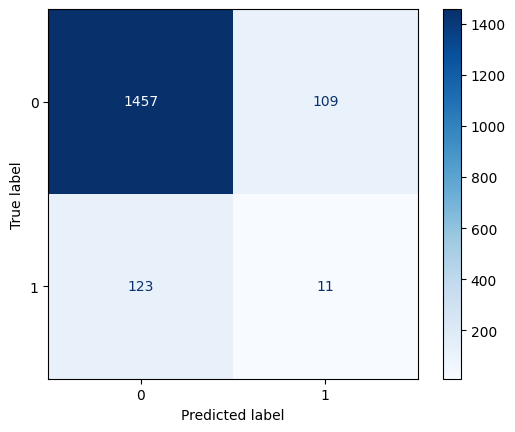

In [4]:
# 主程序
model = load_model()
_, test_dataloader = load_dataloader()
pred_labels, true_labels = predict(model, test_dataloader)
plot_confusion_matrix(pred_labels, true_labels)
